Задача: предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

# Подготовительная часть

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [9]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

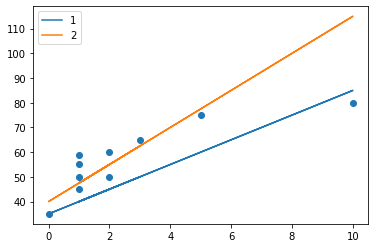

In [10]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [13]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(94.0, -21.0)

MAE (Mean Absolute Error):

In [14]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(10.4, 7.9)

MSE (Mean Squared Error):

In [16]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов (МНК):

In [17]:
X.shape

(2, 10)

In [18]:
X.T.shape

(10, 2)

In [19]:
all(X @ y == np.dot(X,y))

True

In [20]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

In [21]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

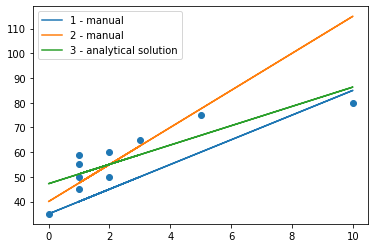

In [22]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [23]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [24]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(10.4, 143.6)

In [25]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(7.9, 151.35)

In [26]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142857, 45.937499999999986)

Градиентный спуск

In [27]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [28]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [29]:
W[0], W[0] - g

(47.23214285714285, 47.43549999999999)

# Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [30]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.102 3.9  ], MSE = 3173.15
Iteration #10: W_new = [ 7.48556387 10.91164634], MSE = 912.09
Iteration #20: W_new = [10.82400397 10.61449967], MSE = 770.86
Iteration #30: W_new = [13.57320088 10.124621  ], MSE = 664.64
Iteration #40: W_new = [15.88885938  9.69834451], MSE = 581.68
Iteration #50: W_new = [17.8546806   9.33546896], MSE = 515.97
Iteration #60: W_new = [19.53409617  9.02536763], MSE = 463.27
Iteration #70: W_new = [20.97700086  8.75892657], MSE = 420.52
Iteration #80: W_new = [22.22310405  8.5288245 ], MSE = 385.48
Iteration #90: W_new = [23.30429492  8.32917442], MSE = 356.48


In [38]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0

array([47.23214286,  3.91071429])

In [39]:
def grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    
    n = X.shape[1]
    W = np.array([1, 0.5])
    min_err = float('inf')
    n_iter = 0
    stop_chek = True
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:
            min_err = err
        else:
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [40]:
W_1, mse_1 = grad_desc(X, y, alpha=0.06, verbose=True)
W_1, mse_1

100 [47.16186867  3.92369094] 45.940520074317476
200 [47.23203087  3.91073496] 45.93750000766935
Stop descent! iteration: 287, weights: [47.23214242  3.91071437], mse: 45.9375000000001


(array([47.23214244,  3.91071436]), 45.9375000000001)

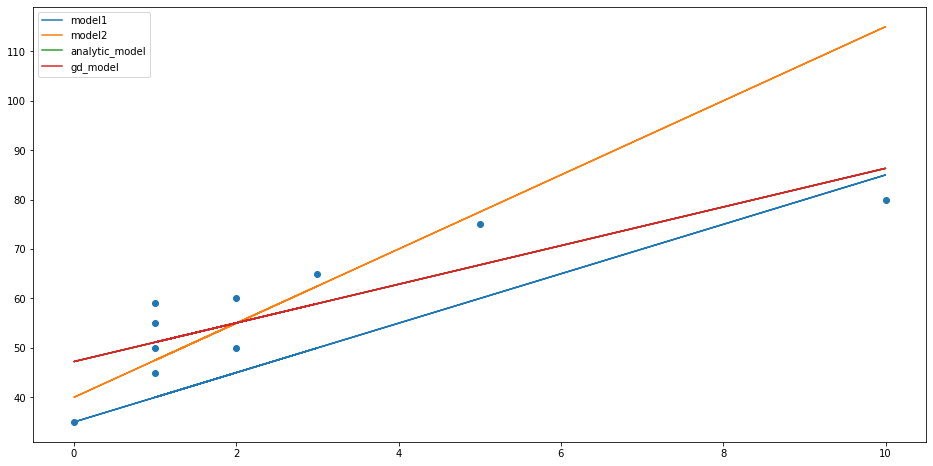

In [41]:
plt.figure(figsize=(16, 8))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.plot(X[1], W_1[0] + W_1[1] * X[1], label='gd_model')
plt.legend(loc='best')
plt.show()

Вывод: максимальное приближение к минимуму за 287 итераций. Линии регрессии полученные аналитическим методом, и методом градиентного спуска перекрывают друг друга.

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [42]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.502 5.002], MSE = 3173.15
Iteration #10: W_new = [11.79295096 11.29295096], MSE = 737.14
Iteration #20: W_new = [11.8219808 11.3219808], MSE = 737.09
Iteration #30: W_new = [11.82211476 11.32211476], MSE = 737.09
Iteration #40: W_new = [11.82211538 11.32211538], MSE = 737.09
Iteration #50: W_new = [11.82211538 11.32211538], MSE = 737.09
Iteration #60: W_new = [11.82211538 11.32211538], MSE = 737.09
Iteration #70: W_new = [11.82211538 11.32211538], MSE = 737.09
Iteration #80: W_new = [11.82211538 11.32211538], MSE = 737.09
Iteration #90: W_new = [11.82211538 11.32211538], MSE = 737.09


In [43]:
n = X.shape[1]
alpha = 0.06

W = np.array([1, 0.5])

for i in range(287):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # for ii in range(W.shape[0]):
    # W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1))) # установим параметр axis=1 в функции np.sum()
    if i % 10 == 0:
        print(i, W, err)

0 [ 7.612 20.9  ] 3173.15
10 [25.72983979  9.05170097] 364.6834436471203
20 [35.85695572  6.15284752] 125.86627725452965
30 [41.24888118  5.03270471] 67.8592661647404
40 [44.0891315   4.49316871] 51.980145468359524
50 [45.5816168   4.21574742] 47.60357573538611
60 [46.3654434   4.07078732] 46.39687623882493
70 [46.77704197  3.99475582] 46.06416092142592
80 [46.99317184  3.95484256] 45.972423420722386
90 [47.10666058  3.9338856 ] 45.9471292155766
100 [47.16625286  3.92288138] 45.94015500316733
110 [47.19754441  3.91710315] 45.93823204735757
120 [47.21397542  3.91406904] 45.93770184282277
130 [47.22260325  3.91247585] 45.93755565285454
140 [47.22713366  3.91163927] 45.93751534481224
150 [47.22951256  3.91119999] 45.93750423092875
160 [47.2307617   3.91096933] 45.93750116656743
170 [47.23141762  3.91084821] 45.93750032165032
180 [47.23176204  3.91078461] 45.937500088686626
190 [47.23194289  3.91075121] 45.937500024453016
200 [47.23203786  3.91073367] 45.937500006742255
210 [47.23208772  3

В результате функция градиентного спуска примет окончательный вид:

In [46]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    
    n = X.shape[1]
    W = np.array([1, 0.5])
    min_err = float('inf')
    n_iter = 0
    stop_chek = True
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:
            min_err = err
        else:
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [47]:
W_1, mse_1 = my_grad_desc(X, y, alpha=0.06, verbose=True)
W_1, mse_1

100 [47.16186867  3.92369094] 45.940520074317476
200 [47.23203087  3.91073496] 45.93750000766935
Stop descent! iteration: 287, weights: [47.23214242  3.91071437], mse: 45.9375000000001


(array([47.23214244,  3.91071436]), 45.9375000000001)